In [1]:
"""
Hernández Navaro Armando

Practica 1: Fundamentos en python
"""

import pandas as pd

# Leemos el csv y lo pasamos a un dataframe
datos = pd.read_csv("/content/datos.csv")
display(datos)

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [2]:
"""
Ejercicio 1. Obtener minimo, maximo, media y desviación estandar para el número de horas y las calificaciones obtenidas
"""
## Horas dedicadas

#Calculamos los valores
minHoras = datos["horas_dedicadas"].min()
maxHoras = datos["horas_dedicadas"].max()
mediaHoras = datos["horas_dedicadas"].mean()
desviacionHoras = datos["horas_dedicadas"].std()

#Mostramos los valores
print("Horas dedicadas")
print("Minimo de horas dedicadas: ", minHoras, "\nMaximo de Horas dedicadas: ",  maxHoras,
      "\nMedia de horas dedicadas: ", mediaHoras, "\nDesviacion estandar de las horas dedicadas",
      desviacionHoras)


## Calificaciones obtenidas

#Calculamos los valores
minCalificaciones = datos["calificaciones_obtenida"].min()
maxCalificaciones = datos["calificaciones_obtenida"].max()
mediaCalificaciones = datos["calificaciones_obtenida"].mean()
desviacionCalificaciones = datos["calificaciones_obtenida"].std()

#Mostramos los valores
print("\nCalificaciones: ")
print("Minimo de horas dedicadas: ", minCalificaciones, "\nMaximo de Horas dedicadas: ",  maxCalificaciones,
      "\nMedia de horas dedicadas: ", mediaCalificaciones, "\nDesviacion estandar de las horas dedicadas",
      desviacionCalificaciones)



Horas dedicadas
Minimo de horas dedicadas:  2 
Maximo de Horas dedicadas:  178 
Media de horas dedicadas:  99.4 
Desviacion estandar de las horas dedicadas 58.129075974801204

Calificaciones: 
Minimo de horas dedicadas:  0.0 
Maximo de Horas dedicadas:  100.0 
Media de horas dedicadas:  64.05555555555556 
Desviacion estandar de las horas dedicadas 33.539217119177366


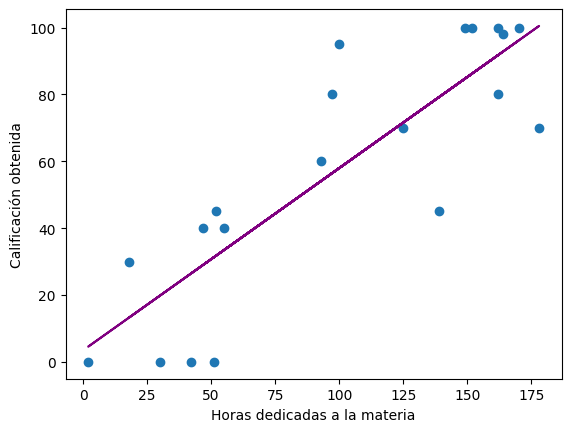

In [3]:
from math import nan
"""
Ejercicio 2. Lleva a cabo un analisis de regresión lineal y presenta un grafo que muestre el modelo de regresión
junto con los datos originales
"""
#Importamos matplotlib, numpy y sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Analisis de regresión lineal para horas

# Pasamos la columna de horas a array y transponemos para usar como variable independiente
horasDedicadasArray = np.array(datos["horas_dedicadas"])
horasDedicadasArray = horasDedicadasArray.reshape(-1, 1)

# Pasamos la columna de calificación a array en vertical para usar como variable dependiente
calificacionArray = np.array(datos["calificaciones_obtenida"])


# Nos asegurmaos de que no haya valores nan
# Ya que son calificaciones y tiempo, asumimos que podemos remplazar nan por 0
horasDedicadasArray = np.nan_to_num(horasDedicadasArray)
calificacionArray = np.nan_to_num(calificacionArray)


# Creamos y entrenamos el modelo de regresion lineal
modelo = LinearRegression()
modelo.fit(horasDedicadasArray, calificacionArray)


#Creamos la grafica con el modelo y los datos originales
plt.scatter(horasDedicadasArray, calificacionArray)
plt.xlabel('Horas dedicadas a la materia')
plt.ylabel('Calificación obtenida')
plt.plot(horasDedicadasArray, modelo.predict(horasDedicadasArray), color='purple')
plt.show()







In [4]:
"""
Ejercicio3. Utiliza el modelo de regresión para realizar una predicción de la calificación de un estudiante
que hubiera dedicado "n" horas a la materia. Donde n es la suma de los digitos de su número de
cuenta módulo 50
"""
## Tomamos nuestro número de cuenta = 317340347
nc = 317340347

# Sumamos los digitos del número de cuenta y sacamos modulo 50
# (Ya que el resultado es 32, el modulo 50 nos regresa...   32)
ncarray = np.array([int(i) for i in str(nc)])
res = ncarray.sum()
res = res % 50
res

# Realizamos la prediccion del modelo
predic = modelo.predict([[res]])

print("Suponiendo una inversión de ",  res, "horas en la materia, se esperaria ",
      "obtener una calificación de: ", predic)


Suponiendo una inversión de  32 horas en la materia, se esperaria  obtener una calificación de:  [20.91766769]


# Ejercicio 4.

Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos

  

# Método $R^2$

Calcula la proporción de la varianza de la variable dependiente de acuerdo a la variable independiente del modelo de regresión. Es una medida de que tan bueno es el modelo para poder replicar los resultados observados, basándose en la proporción de la variación total de los resultados del modelo

  

Este valor se encuentra entre 0 y 1 donde:

- $R^2 = 0$: indica que el modelo no predice de forma correcta

- $R^2 = 1$: indica que el modelo es capaz de predecir de forma exacta

  

$R^2 = (r)^2$ donde r es el coeficiente de correlación de Pearson

  

# Regression Standard Error (RSE)

  

Calcula la distancia promedio entre los valores observados y los valores del modelo de regresión obtenido.

  

Ya que esta es una métrica de error, se busca minimizarla.

  

# Chi-square / Goodnes of fit tests

Prueba si las frecuencias observadas de una o mas categorías encajan con las frecuencias esperadas. Se realiza al comparar los valores observados a los valores que se esperarían si la hipótesis nula que se tiene es verdadera

  

$\chi^2_c = \sum \frac{(O_i - E_i)^2}{E_i}$

Donde:

- c es el grado de libertad

- $O_i$ son los valores observados

- $E_i$ es el valor esperado

  
  

# Cross validation

Técnica usada previo al entrenamiento del modelo, para asegurar que la certitud de la predicción sea independiente del conjunto de datos usados.

  

Se basa en la partición del conjunto de datos en un subconjunto de entrenamiento y un subconjunto de prueba (Puede ser mas de un subconjunto de cada tipo).

  

# Akaike information criterion

Usado para estimar el nivel de error de la predicción. Ya que permite ver el nivel de error de un modelo, es usado para evaluar y comparar la calidad de diferentes modelos.

  

Se busca minimizar

  

$AIC = 2K - 2ln(L)$

donde:

- K es el número de parámetros en el modelo

- L es la función de verosimilitud del modelo